In [565]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error


import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [21]:
data = pd.read_csv('./archive/fish.csv')

In [22]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Task 1: Model Complexity
## Predicting the weight

#### Populate first random column with data randomly generated between 10 and 100 name the column "Rand1"
- Created random integer between 10 and 100 and add fraction, then round 4 digits

In [23]:
data['Rand1'] = np.NaN
data['Rand1'] = data['Rand1'].apply(lambda x: round(np.random.randint(10, 100) + np.random.rand(), 4))

In [24]:
np.random.seed(0)
data['Rand2'] = np.NaN
data['Rand2'] = data['Rand2'].apply(lambda x: np.random.randint(1, 7))

In [26]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width,Rand1,Rand2
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,50.7561,5
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,82.8960,6
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,62.8916,1
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,71.4471,4
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,14.9786,4
...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,61.3277,4
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,90.0271,3
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,57.2400,4
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,10.0098,6


#### Since Linear Regression does not work with string, change the Species column values into numeric

In [39]:
data.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [386]:
df = data.copy()
# df['Species'] = df['Species'].astype('category').cat.codes

#### Since it is not an ordered column, we can not simply assign increasing values (i.e. 1 2 3 4) in order not to manipulate the model
We will include dummy binary columns stating whether it is species x or not. Also we should eliminate the first column of the dummy df, since all the other 0 flagged dummy columns states that it is a Species of Bream.

In [387]:
species_dummies = pd.get_dummies(data.Species, prefix='Species', drop_first=True)

In [388]:
df = pd.concat([df, species_dummies], axis=1)

In [394]:
# define x and y's
y = df['Weight']
X = df[[col for col in df.columns if col != 'Species' and col != 'Weight']]

#### Models:
- Model-1: with all variables
- Model-2: Drop column Rand1
- Model-3: Drop column Rand1 & Rand2
- Model-4: Drop column Rand1 & Rand2 & Keep only the top two records (since dropping rand1 & rand2 columns are not clearly stated in the assignment, I assumed dropping those two.)

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logger.info("Train Data: {0} \n Test Data: {1}".format(X_train.shape, X_test.shape))

INFO:root:Train Data: (111, 13) 
 Test Data: (48, 13)


*The Linear Regression is used for solving Regression problems whereas Logistic Regression is used for solving the Classification problems.*[1](https://www.javatpoint.com/linear-regression-vs-logistic-regression-in-machine-learning#:~:text=Linear%20regression%20is%20used%20to,given%20set%20of%20independent%20variables.&text=The%20output%20for%20Linear%20Regression%20must%20be%20a%20continuous%20value,as%20price%2C%20age%2C%20etc.)

Since our outcome is regression problem, we can use linear regression for predicting weight.
-[Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

#### Multilinear Regression Formula
$$y = b_0 + b_1X_1 + b_2X_2 + ... + b_nX_n$$

$$y: Dependent Variable$$

$$b_0: Intercept$$

$$b_1 - b_n: \beta \ Coefficients$$

$$X_1 - X_n: Independent variables$$

In [438]:
def run_models(model_id, train_x, train_y, test_x, test_y):

    if model_id == 2:
#       Drop column Rand1 
        train_x = train_x.drop('Rand1', axis=1)
        test_x = test_x.drop('Rand1', axis=1)
    elif model_id == 3:
#       Drop column Rand1 and Rand2
        train_x = train_x.drop(['Rand1', 'Rand2'], axis=1)
        test_x = test_x.drop(['Rand1', 'Rand2'], axis=1)
    elif model_id == 4:
#       Drop column Rand1 and Rand2
#       Keep only the top two records
        train_x = train_x.drop(['Rand1', 'Rand2'], axis=1)
        train_x = train_x.head(2)
        train_y = train_y.head(2)
        
        test_x = test_x.drop(['Rand1', 'Rand2'], axis=1)
        test_x = test_x.head(2)
        test_y = test_y.head(2)
    else:
    # model with all variables
        pass
    lr = LinearRegression()
    lr.fit(train_x, train_y)
    logger.info('\nModel ID: {0}\n'.format(model_id))
    logger.info('\nX vars: {0}\n'.format(list(train_x.columns)))
    logger.info('\nIntercept: {0}\nCoefficients: {1}\n'.format(lr.intercept_, list(zip(train_x.columns, lr.coef_))))
    
    training_score = lr.score(train_x, train_y)
    logger.info('\nTraining Score: {0}\n'.format(training_score))
    y_pred = lr.predict(test_x)
    rsq = r2_score(test_y, y_pred)
    logger.info('\nR^2: {0}\n'.format(rsq))  
    
    stats = {
        'training_score': training_score,
        'rsq': rsq,
        'intercept': lr.intercept_,
        'coef': lr.coef_,
        'details_coeff': list(zip(train_x.columns, lr.coef_))
    }
    
    return stats

In [450]:
final_df = pd.DataFrame(columns=['Fold', 'model_id', 'training_acc', 'rsq', 'intercept', 'coef'])
kf = KFold(n_splits=5, shuffle=True)  # Define the split
fold = 0
for train_index, test_index in kf.split(df):
    fold = fold + 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    logging.info("Fold #: {0}".format(fold))
    for i in range(1,5):
        stats = run_models(i, X_train, y_train, X_test, y_test)
        final_df = final_df.append({
                        'Fold': fold,
                        'model_id': i,
                        'training_acc': stats['training_score'],
                        'rsq': stats['rsq'],
                        'intercept': stats['intercept'],
                        'coef': stats['coef'],
                        'details_coeff': stats['details_coeff']}, ignore_index=True)
    print("####################################")

INFO:root:Fold #: 1
INFO:root:
Model ID: 1

INFO:root:
X vars: ['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Rand1', 'Rand2', 'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt', 'Species_Whitefish']

INFO:root:
Intercept: -879.5687809557165
Coefficients: [('Length1', -115.226847574965), ('Length2', 112.30160285275412), ('Length3', 36.38588392572648), ('Height', -3.609614684155062), ('Width', -7.8965077138831035), ('Rand1', -0.04175745506130646), ('Rand2', -6.4211741895402135), ('Species_Parkki', 135.43349422109188), ('Species_Perch', 109.34513792064794), ('Species_Pike', -279.78751518840505), ('Species_Roach', 75.67580347789443), ('Species_Smelt', 423.9063345881278), ('Species_Whitefish', 114.81721979449459)]

INFO:root:
Training Score: 0.9426827303116784

INFO:root:
R^2: 0.8880284421214941

INFO:root:
Model ID: 2

INFO:root:
X vars: ['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Rand2', 'Species_Parkki', 'Species_Perch', 'Species_Pike', 

####################################
####################################


INFO:root:
X vars: ['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt', 'Species_Whitefish']

INFO:root:
Intercept: -349.5428640368507
Coefficients: [('Length1', -9.019564470028595), ('Length2', -2.4897493088691425), ('Length3', 10.691818438352787), ('Height', 42.58780181579286), ('Width', 13.102080128923635), ('Species_Parkki', 0.0), ('Species_Perch', 0.0), ('Species_Pike', 0.0), ('Species_Roach', 0.0), ('Species_Smelt', 0.0), ('Species_Whitefish', 0.0)]

INFO:root:
Training Score: 1.0

INFO:root:
R^2: -19.22094977291175

INFO:root:Fold #: 4
INFO:root:
Model ID: 1

INFO:root:
X vars: ['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Rand1', 'Rand2', 'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt', 'Species_Whitefish']

INFO:root:
Intercept: -874.8526226886531
Coefficients: [('Length1', -58.509418565048755), ('Length2', 49.44437135725046), ('Length3', 37.81575046

####################################
####################################
####################################


In [451]:
results = final_df.groupby('model_id').agg({'training_acc': 'mean',
                                           'rsq': 'mean'})

In [452]:
results

,training_acc,rsq
model_id,,
1,0.938516,0.916373
2,0.938269,0.916850
3,0.937752,0.917092
4,1.000000,-8.431254


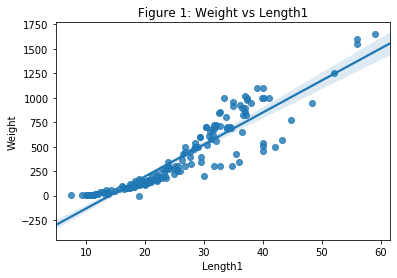

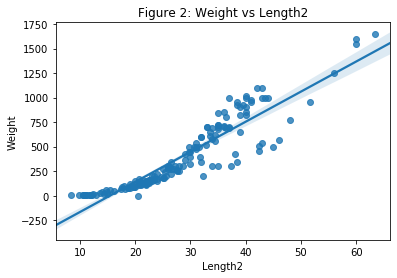

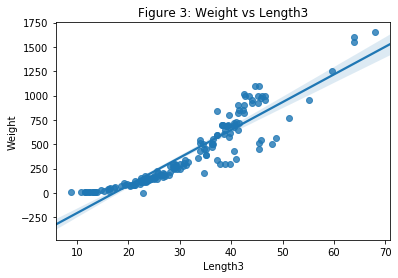

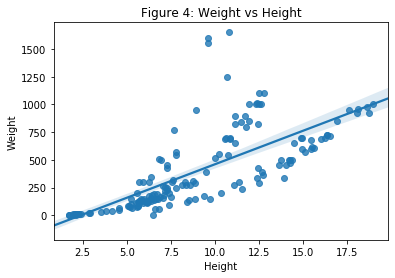

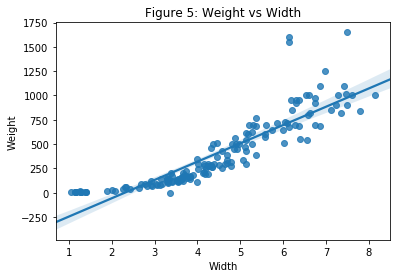

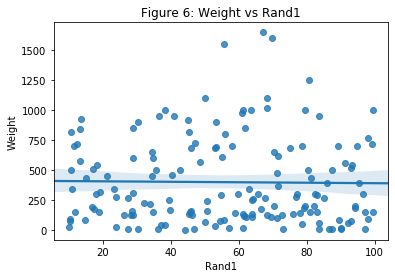

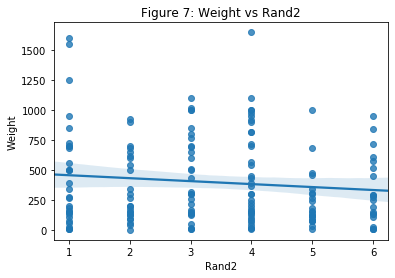

In [468]:
# regression trends of features with the dependent variable
i = 0
for col in ['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Rand1', 'Rand2']:
    i = i + 1
    plt.figure()
    sns.regplot(x = col, y = 'Weight', data = df).set_title('Figure {0}: {1} vs {2}'.format(i, 'Weight', col));
plt.show()

#### Results
In order to examine the results clearly, we splitted data into 5 folds and than average all the metrics by model. As expected, model 4 which is keeping only top two records, is overfitted and failed in test. This is not a correct model when it comes to predicting the outcomes because it does not have any background on learning patterns. Also, $R^2$ values of model 4 is strange, which is out of range [-1, 1], this may happen in small datasets, which we have two rows, it is stated that our dataset should be of a shape where *$m > n^2$* when the number of features is *n*, and the number of rows is *m*.

On comparing other models,

|model_id | avg training score | avg $R^2$ |
| --- | --- | --- |
|1 | 0.938516	 | 0.916373 | 
|2 | 0.938269	 |	0.916850 |
|3 | 0.937752 |	0.917092 |
|4| 1 | -8.431254 |

their results almost similar to each other. As expected, model 3 is the top one since it is the pure data without random column appends. In terms of training scores & $R^2$, model 3 performs better than the rest of them. However, the differences are negligible. Adding the *Rand1* column to the model relatively performs worse than *Rand2* column. This can be explained by the figures above (Fig. 6 & 7), the plot of *Rand1* column with respect to *Weight* shows that it has no correlation with the data. However, *Rand2* column has a slowly decreasing trend with the data. So, excluding Rand1, Rand1 & Rand2 respectively improved the model and resulted as model 3.

# Task 2: Optimization

In order to find coefficients and intercept, we should add a column of 1s into X, train array. Since previously we tried 5 fold, we will execute linear regression one more time just like in model-1, to get a benchmark.

In [1166]:
X_train.columns

Index(['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Rand1', 'Rand2',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [1167]:
X = np.array(X_train)
X = np.insert(X, 0, np.zeros(X.shape[0]) + 1, axis=1) # add a column of 1

Defining Loss as sum of squared errors, $SSE$

In [1158]:
def loss(x):
    return np.sum(np.square((np.dot(X, x) - Y)))


x0 = np.zeros(X.shape[1])
res = minimize(loss, x0, method='SLSQP',
               options={'disp': True})

logger.info(res.x)
logger.info('\nOur Regression Intercept = {0}'.format(res.x[0]))
logger.info('\n Our Regression Coefficients = {0}'.format(res.x[1:]))
# print(np.dot(res.x, X.T))
# print(np.sum(np.square(np.dot(res.x, X.T) - Y)))

INFO:root:[-912.50313889  -51.09884918   59.62481425   24.54022172   15.92791602
  -14.71165646    0.31461586   -5.07150155  158.60531341  178.503839
 -168.47441673  115.06505719  446.11887216  123.01838692]
INFO:root:
Our Regression Intercept = -912.5031388864352
INFO:root:
 Our Regression Coefficients = [ -51.09884918   59.62481425   24.54022172   15.92791602  -14.71165646
    0.31461586   -5.07150155  158.60531341  178.503839   -168.47441673
  115.06505719  446.11887216  123.01838692]


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1006962.9452056424
            Iterations: 22
            Function evaluations: 394
            Gradient evaluations: 22


In [1159]:
# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression().fit(X_train, y_train)
logger.info('\n Sklearn Intercept = {0}'.format(lr.intercept_))
logger.info('\n Sklearn Coefficients = {0}'.format(lr.coef_))

INFO:root:
 Sklearn Intercept = -912.5010376153836
INFO:root:
 Sklearn Coefficients = [ -51.09830046   59.6240684    24.5403018    15.92787391  -14.71092287
    0.31461253   -5.0715961   158.60442995  178.5034078  -168.47280827
  115.06439571  446.11835592  123.01766434]


As we can see from the logs, both Sklearn & our regression intercepts, coefficients are same. We can double check with the last fold & Model 1 coefficients (since we are using last fold's data). Again, we get the same results.

In [1165]:
logger.info("\nLast Fold's Coefficients = {0}".format(list(final_df.loc[(final_df.Fold == 5) & (final_df.model_id == 1)]['coef'])))
logger.info("\nLast Fold's Intercept = {0}".format(list(final_df.loc[(final_df.Fold == 5) & (final_df.model_id == 1)]['intercept'])))

INFO:root:
Last Fold's Coefficients = [array([ -51.09830046,   59.6240684 ,   24.5403018 ,   15.92787391,
        -14.71092287,    0.31461253,   -5.0715961 ,  158.60442995,
        178.5034078 , -168.47280827,  115.06439571,  446.11835592,
        123.01766434])]
INFO:root:
Last Fold's Intercept = [-912.5010376153836]


# Task 3: Regularization
## Lasso Regression Formula
![Objective Function](./lasso1.png)
$s.t.$
![Constraint](./lasso_cons.png)


#### Lasso with Upper Bound Constraint
Aim is to force coefficient values closer to zero, which is the ideal for producing simpler models. First we start with upper bound constraint, as can be seen from the above formula, when $\lambda = 0 $ then we can limit the weigths ($\beta$) of the features with the first constraint.

In [878]:
from scipy.optimize import minimize

def predict(X,w):
    return np.dot(X,w)

def LossLasso(weights, X, y, alpha):
    w = weights
    y_pred = predict(X,w)
    loss = np.linalg.norm(y - y_pred)**2 + alpha * np.sum(abs(w)) #lasso loss formula
    return loss

def constraint(w, bound=u_bound):
    return bound - np.sum(abs(w))

def fit(X,y,alpha=0, bound=u_bound):
    initw = np.random.rand(X.shape[1]) #initial random weights
    cons = ({'type': 'ineq', 'fun': constraint})
    #calling minimizer with SLSQP method
    res = minimize(LossLasso,
                initw,
                args=(X,y,alpha),
                constraints=cons,
                method='SLSQP',
                  options={'maxiter': 1000})
    return res, y_pred

First, *Upper Bound* is 1000 and $\lambda$ value is 0 in order to see the upper bound effect.

In [875]:
u_bound = 1000
res, y_pred = fit(X_train, y_train,alpha=0, bound=u_bound)
logger.info('Boundary constraint is {0} >= {1}'.format(u_bound, sum(abs(res.x))))
logger.info(res)

INFO:root:Boundary constraint is 1000 >= 999.9999999340434
INFO:root:     fun: 1980492.406872214
     jac: array([-557.28125 , -557.28125 ,  557.328125, -557.5     , -557.28125 ,
        557.375   ,  557.328125,  557.28125 ,  557.328125,  557.375   ,
        557.328125,  557.328125,  557.328125])
 message: 'Optimization terminated successfully.'
    nfev: 2019
     nit: 129
    njev: 129
  status: 0
 success: True
       x: array([  59.18470695,   82.4724527 , -118.47193039,   44.52520482,
         22.97436482,   -1.20761672,  -33.18474901, -220.27452872,
       -194.4730709 ,  -83.70419379,  -99.92543091,  -12.24892361,
        -27.35282659])


As can be seen from the logs, the regularization is not working since almost all the coefficients are far from the 0.
One possible solution might be the decreasing upper bound while others kept same. Let's try 100.

In [879]:
u_bound = 100
res, y_pred = fit(X_train, y_train,alpha=0, bound=u_bound)
logger.info('Boundary constraint is {0} >= {1}'.format(u_bound, sum(abs(res.x))))
logger.info(res)

INFO:root:Boundary constraint is 100 >= 99.99999999999957
INFO:root:     fun: 3179067.7977260556
     jac: array([-3807.96875, -2814.5625 ,  3163.375  , -3822.875  , -3824.28125,
        3891.     ,  3828.90625,  2727.9375 ,   730.53125,  1311.9375 ,
        2227.15625,  -478.4375 ,  -496.125  ])
 message: 'Optimization terminated successfully.'
    nfev: 4982
     nit: 308
    njev: 308
  status: 0
 success: True
       x: array([ 17.49152172,   0.00008191,  -0.        ,  11.29174407,
        25.59351942,  -1.8697861 , -43.75320791,  -0.00009391,
         0.00000323,  -0.00000642,  -0.00000219,   0.00001834,
         0.00001477])


100 for the upper bound seems to be working quite good since most of the coefficients are close to zero.

#### Lasso with Lagrange Multiplier
Now, we eliminate the upper bound constraint and change the value of $\lambda$, as can be seen from the above formula, when there is no constraint, the only way to push coefficients to be around zero is to increase the effect of right part of the multi-objective function. This can be achieved by the control parameter, $\lambda$. As $\lambda$ increases, more and more coefficients are set to zero and eliminated. (theoretically, when $\lambda = \infty $, all coefficients are eliminated)

Let's try with a small $\lambda$ such as 0.0001.

In [884]:
def fit(X,y,alpha=0, bound=1000):
    initw = np.random.rand(X.shape[1]) #initial random weights
    cons = ({'type': 'ineq', 'fun': constraint})
    #calling minimizer with SLSQP method
    res = minimize(LossLasso,
                initw,
                args=(X,y,alpha),
#                 constraints=cons,
                method='SLSQP',
                  options={'maxiter': 100})
    return res, y_pred

res, y_pred = fit(X_train, y_train,alpha=0.0001, bound=1000)
logger.info('Boundary constraint is {0} >= {1}'.format(bound, sum(abs(res.x))))
logger.info(res)

INFO:root:Boundary constraint is 1000 >= 3309.8639782964055
INFO:root:     fun: 1355722.9723254538
     jac: array([-0.046875,  0.03125 , -0.046875,  0.109375, -0.046875,  0.0625  ,
        0.      , -0.046875,  0.      ,  0.      ,  0.      ,  0.      ,
       -0.046875])
 message: 'Optimization terminated successfully.'
    nfev: 310
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([ -12.01175188,  178.00722477, -126.98695183,  -21.81742247,
         62.44657137,    0.08223991,  -13.26308428, -323.60776255,
       -589.47490355, -810.47790663, -427.85250202, -319.80610369,
       -424.02955336])


As expected, we did not give weight to right part of the objective function. Since there were no constraints, the $\beta$ values are huge. However, we can simply increase the $\lambda$ in order coefficients to be around zero, as previously mentioned.

So let's try with a greater $\lambda$, 10.

In [883]:
def fit(X,y,alpha=0, bound=1000):
    initw = np.random.rand(X.shape[1]) #initial random weights
    cons = ({'type': 'ineq', 'fun': constraint})
    #calling minimizer with SLSQP method
    res = minimize(LossLasso,
                initw,
                args=(X,y,alpha),
#                 constraints=cons,
                method='SLSQP',
                  options={'maxiter': 100})
    return res, y_pred

res, y_pred = fit(X_train, y_train,alpha=10, bound=1000)
logger.info('Boundary constraint is {0} >= {1}'.format(bound, sum(abs(res.x))))
logger.info(res)

INFO:root:Boundary constraint is 1000 >= 3254.9850477509985
INFO:root:     fun: 1388546.9464100674
     jac: array([ 0.453125,  0.46875 ,  0.484375,  0.0625  ,  0.078125,  0.71875 ,
        0.015625, -0.015625, -0.015625, -0.015625, -0.015625,  0.015625,
       -0.015625])
 message: 'Optimization terminated successfully.'
    nfev: 345
     nit: 20
    njev: 20
  status: 0
 success: True
       x: array([  -8.75392891,  174.47602219, -126.91813386,  -20.26527537,
         61.34585196,    0.05736933,  -13.59780023, -321.8793707 ,
       -581.14549258, -795.65799582, -421.22900318, -314.05524511,
       -415.60355851])


Sum of absolute $\beta$ values were around 3309, now it is 3255. There is a decrease but it is not enough.

Let's try higher, 10000?

In [885]:
def fit(X,y,alpha=0, bound=1000):
    initw = np.random.rand(X.shape[1]) #initial random weights
    cons = ({'type': 'ineq', 'fun': constraint})
    #calling minimizer with SLSQP method
    res = minimize(LossLasso,
                initw,
                args=(X,y,alpha),
#                 constraints=cons,
                method='SLSQP',
                  options={'maxiter': 100})
    return res, y_pred

res, y_pred = fit(X_train, y_train, alpha=10000, bound=1000)
logger.info('Boundary constraint is {0} >= {1}'.format(bound, sum(abs(res.x))))
logger.info(res)

INFO:root:Boundary constraint is 1000 >= 71.40046917948459
INFO:root:     fun: 4061398.5221354086
     jac: array([  -279.96875,     48.0625 ,   6157.625  ,    -84.71875,
         2254.3125 ,   -489.1875 ,    -25.6875 ,  -7161.34375,
       -10031.09375,  -8156.84375,  -7639.25   ,  10124.25   ,
         9299.6875 ])
 message: 'Optimization terminated successfully.'
    nfev: 1212
     nit: 68
    njev: 68
  status: 0
 success: True
       x: array([ 20.10212568,   0.00000052,   0.00017027,  13.72250222,
         0.0001578 ,  -1.92380984, -35.6502183 ,  -0.00011974,
        -0.00070591,  -0.00001442,  -0.00025157,   0.00007364,
         0.00031927])


Now, sum of absolute $\beta$ value is 71, much smaller than previous. As mentioned above, when $\lambda$ gets larger and larger, our coefficients forced around to 0, and regularization is working.

The two solutions are close to each other. We can try to make both of the solutions be the same by adding an equality constraint with a value of 72, (or an upper & lower bound constraints), which is from previous one.

In [894]:
def constraint(w, bound=u_bound):
    return bound - np.sum(abs(w))

def fit(X,y,alpha=0, bound=u_bound):
    initw = np.random.rand(X.shape[1]) #initial random weights
    cons = ({'type': 'eq', 'fun': constraint})
    #calling minimizer with SLSQP method
    res = minimize(LossLasso,
                initw,
                args=(X,y,alpha),
                constraints=cons,
                method='SLSQP',
                  options={'maxiter': 1000})
    return res, y_pred

In [898]:
u_bound = 71.40046917948459
# sum(abs(res.x)) # previous result
res, y_pred = fit(X_train, y_train,alpha=0, bound=u_bound)
logger.info('Boundary constraint is {0} == {1}'.format(u_bound, sum(abs(res.x))))
logger.info(res)

INFO:root:Boundary constraint is 71.40046917948459 == 71.40046925516653
INFO:root:     fun: 3347378.5165967015
     jac: array([-10011.40625,  -9662.     ,  -3527.1875 , -10003.34375,
        -7702.59375,   9984.59375,  10001.40625,   2838.96875,
          -27.84375,   1845.28125,   2361.40625,    124.625  ,
         -699.8125 ])
 message: 'Optimization terminated successfully.'
    nfev: 5558
     nit: 340
    njev: 340
  status: 0
 success: True
       x: array([ 20.10504383,   0.00000179,   0.00000006,  13.71936897,
         0.00002812,  -1.92384046, -35.6521856 ,  -0.00000001,
        -0.00000006,  -0.00000012,  -0.0000001 ,   0.00000013,
        -0.00000001])


As we can see, both of the coefficients are almost the same, but since there are multiple columns, possibility of finding the exact solution is pretty low.

In [919]:
alpha_vers = np.array([ 20.10212568,   0.00000052,   0.00017027,  13.72250222, 0.0001578,
                                    -1.92380984, -35.6502183 ,  -0.00011974, -0.00070591,  -0.00001442,
                                    -0.00025157,   0.00007364, 0.00031927])
constraint_version = np.array([ 20.10504383,   0.00000179,   0.00000006,  13.71936897,
                                          0.00002812,  -1.92384046, -35.6521856 ,  -0.00000001,
                                          -0.00000006,  -0.00000012,  -0.0000001 ,   0.00000013, -0.00000001])

Since all the values are so close to each other, we will add 1 to constraint_version coefficients in order to see clearly that they would be overlapping.

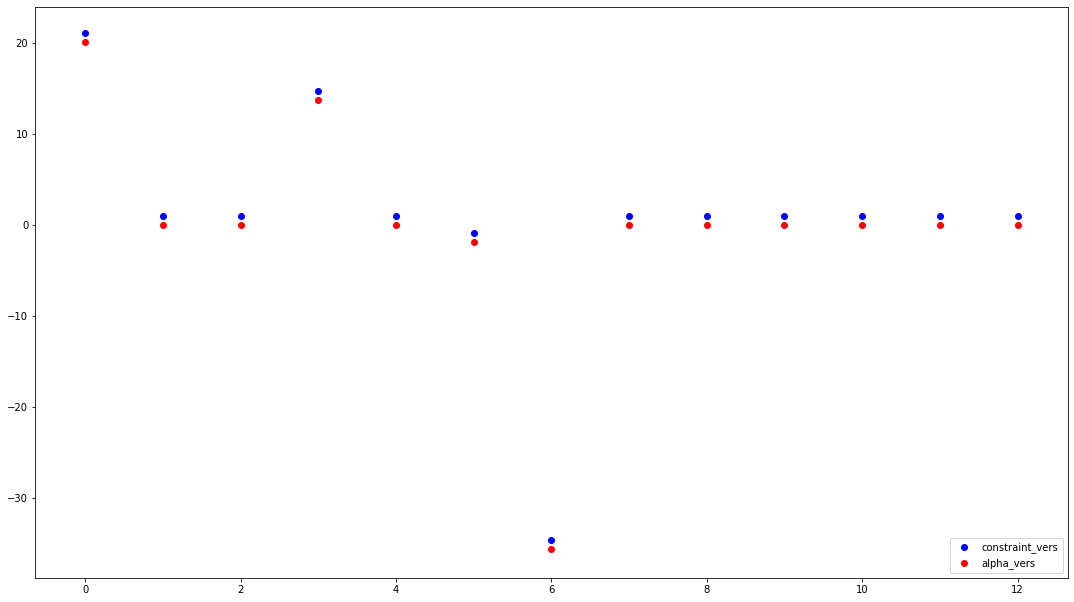

In [940]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax1 = fig.add_subplot(111)

ax1.scatter([i for i in range(len(X_train.columns))], constraint_version+1, c='b', label='constraint_vers')
ax1.scatter([i for i in range(len(X_train.columns))], alpha_vers, c='r', label='alpha_vers')
plt.legend(loc='lower right');
plt.show()

#### sklearn Lasso Model

We will try the built in Lasso from sklearn. First, $\lambda$ value is 0.0001. $\alpha$ is equivalent to $\lambda$ in our implementation.

In [956]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.0001, max_iter=1000000)
clf.fit(X_train, y_train)
logger.info(clf.coef_)
logger.info('Sum of absolute coefficients is {0}'.format(sum(abs(clf.coef_))))

INFO:root:[ -51.09706904   59.63787662   24.52561675   15.92305491  -14.70042219
    0.31462933   -5.07183045  158.55567586  178.42180671 -168.53969756
  115.00550306  446.04001343  122.95562178]
INFO:root:Sum of absolute coefficients is 1360.788817693881


When we compare it with the second node of this task, (the one with the lagrange multiplier), our implementation resulted as total of 3310 absolute coefficients. However, with the same $\lambda$ value, built-in Lasso achieved a total of 1361, which is pretty good.

Now, when we increase the $\lambda$ to 10;

In [959]:
clf = linear_model.Lasso(alpha=10, max_iter=1000000)
clf.fit(X_train, y_train)
logger.info(clf.coef_)
logger.info('Sum of absolute coefficients is {0}'.format(sum(abs(clf.coef_))))

INFO:root:[22.80342039  0.23511261 -0.         16.13097597 38.52440946  0.42926161
 -3.15096137 -0.          0.         -0.         -0.         78.9050376
  0.        ]
INFO:root:Sum of absolute coefficients is 160.17917899757904


The sum of absolute coefficients is 160, and in our implementation with an $\lambda$ 10, it was 3255. Built-in Lasso regularized well when $\lambda$ increases.